# Curva carga-asentamiento de un pilote individual en suelo uniforme

In [2]:
import numpy as np
import matplotlib.pyplot as plt

En primer lugar definimos los datos de la estructura y del suelo

In [31]:
#Pilote
d=1 #diametro (m)
H=15 #longitud (m)

#Suelo
G0=105 #Modulo de corte inicial(MPa)
qpu=5.69 #carga ultima unitaria por punta (MPa)
qfu=0.06 #carga ultima unitaria por friccion (MPa)
Rf=0.8 #relacion de falla
fmp=1 #factor de minoracion de carga por punta
fmf=1 #factor de minoracion de carga por punta

#Calculos auxiliares
A=np.pi*(d**2)/4 #area de la seccion (m2)
per=np.pi*d #perimetro de la seccion (m)
Qpu=qpu*A*fmp #carga ultima total por punta (MN)
Qfu=qfu*per*H*fmf #carga ultima total por fuste (MN)

#Vector de desplazamientos para evaluar las funciones (m)
delta=np.array([0,2,4,6,8,10,20,40,60,80,100])/1000
n=np.size(delta)

Pp=np.zeros(n) #vector de carga por punta
Pf=np.zeros(n) #vector de carga por fuste
P=np.zeros(n) #vector de carga total

Curva carga-desplazamiento (punta)

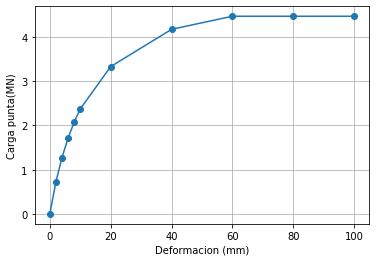

In [25]:
Kp=5*G0/d*fmp*A #rigidez inicial por punta (MN/m)

#Funcion para calcular la carga en funcion del desplazamiento
def f_Pp(delta,Kp,Rf,Qpu):
    Pp1=Qpu
    Pp2=delta/((1/Kp)+(Rf*delta/Qpu))
    return np.minimum(Pp1,Pp2)

#Calculo Pp para cada delta
for i in range(n):
    delta_i=delta[i]
    Pp[i]=f_Pp(delta_i,Kp,Rf,Qpu)
    
#Ploteo
plt.plot(delta*1000,Pp,'-o')
plt.xlabel('Deformacion (mm)')
plt.ylabel('Carga punta(MN)')
plt.grid()
plt.show()

Curva carga-desplazamiento (fuste)

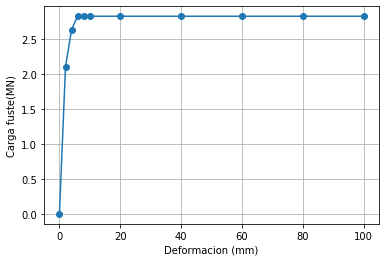

In [36]:
Kf=G0*H*per/(d/2*np.log(3*H/d))*fmf #rigidez inicial por fuste (MN/m)

#Funcion para calcular la carga en funcion del desplazamiento
def f_Pf(delta,Kf,Rf,Qfu):
    Pf1=Qfu
    Pf2=delta/((1/Kf)+(Rf*delta/Qfu))
    return np.minimum(Pf1,Pf2)

#Calculo Pf para cada delta
for i in range(n):
    delta_i=delta[i]
    Pf[i]=f_Pf(delta_i,Kf,Rf,Qfu)
    
#Ploteo
plt.plot(delta*1000,Pf,'-o')
plt.xlabel('Deformacion (mm)')
plt.ylabel('Carga fuste(MN)')
plt.grid()
plt.show()

Ploteando todo junto

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0.         2.10404421 2.63776622 2.82743339 2.82743339 2.82743339
 2.82743339 2.82743339 2.82743339 2.82743339 2.82743339]


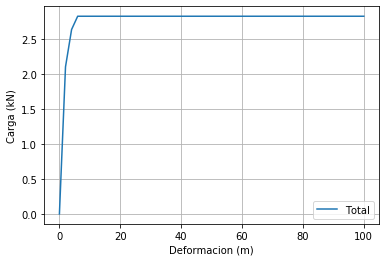

In [39]:
P=Pp+Pf

plt.plot(delta*1000,Pf,label='Fuste')
plt.plot(delta*1000,Pp,label='Punta')
plt.plot(delta*1000,P,label='Total')
plt.xlabel('Deformacion (m)')
plt.ylabel('Carga (kN)')
plt.legend()
plt.grid()
plt.show()